In [90]:
import sys
root_dir = "/Users/krishna/Desktop/Study/NLP Assignments/Course_Project/"
sys.path.append('/Users/krishna/Desktop/Study/NLP Assignments/Course_Project/PDF')

In [91]:
import time
from layout_parser_functions import init_models, extract_pages_and_images, process_page, visualize_layout
from pdfplumber_functions import extract_words_from_pdf, generate_and_display_images_pdfplumber
from merge_boxes import merge_boxes
from treeify import generate_tree
import json, os
from PyPDF2 import PdfMerger

In [92]:
def merge_pdfs(dir_path, output_filename, prefix):
    merger = PdfMerger()

    for item in sorted(os.listdir(dir_path)):
        if item.endswith('.pdf') and item.startswith(prefix):
            merger.append(os.path.join(dir_path, item))

    merger.write(dir_path + "//" + output_filename)
    merger.close()
    
def delete_pdfs(dir_path, prefix):
    for item in os.listdir(dir_path):
        if item.endswith('.pdf') and item.startswith(prefix):
            os.remove(os.path.join(dir_path, item))

In [93]:
def process_pdf(pdf_file_path, use_layoutparser=True, use_pdfplumber=True, generate_images=False):
    lp_all_word_data, pdfplumber_all_words, pymupdf_all_words = [], [], []
    lp_all_layout_data = []

    # Create output directories if they do not exist
    os.makedirs(root_dir + 'PDF/output/PDF', exist_ok=True)
    os.makedirs(root_dir + 'PDF/output/visuals', exist_ok=True)

    if use_layoutparser:
        start = time.time()
        lp_model, ocr_agent = init_models()
        lp_pdf_layout, lp_images = extract_pages_and_images(pdf_file_path)

        for i, image in enumerate(lp_images):
            print(f"Processing page {i+1}/{len(lp_images)} with LayoutParser...")
            # if i+1 <= 1:
            word_data, layout, layout_data = process_page(lp_model, ocr_agent, image, i)
            lp_all_word_data.extend(word_data)
            lp_all_layout_data.extend(layout_data)
            
            if generate_images:
                layout_svg = visualize_layout(image, layout, word_data, layout_data, i)
        
        if generate_images:
            merge_pdfs(root_dir + "PDF/output/visuals", "lp_output.pdf", "layout_visualization_page_")
            delete_pdfs(root_dir + "PDF/output/visuals", "layout_visualization_page_")

        with open(root_dir + 'PDF/output/PDF/lp_output_words.json', 'w') as f:
            json.dump(lp_all_word_data, f, indent=4)
        
        with open(root_dir + 'PDF/output/PDF/lp_output_layout.json', 'w') as f:
            json.dump(lp_all_layout_data, f, indent=4)
        end = time.time()
        print("LayoutParser processing took", end - start, "seconds")

    if use_pdfplumber:
        start = time.time()
        print("Processing document with pdfplumber...")
        pdfplumber_all_words = extract_words_from_pdf(pdf_file_path)
        if generate_images:
            generate_and_display_images_pdfplumber(pdf_file_path, pdfplumber_all_words)
            merge_pdfs(root_dir + "PDF/output/visuals", "pdfplumber_output.pdf", "pdfplumber_output_page_")
            delete_pdfs(root_dir + "PDF/output/visuals", "pdfplumber_output_page_")

        with open(root_dir + 'PDF/output/PDF/pdfplumber_output.json', 'w') as f:
            json.dump(pdfplumber_all_words, f, indent=4)
        end = time.time()
        print("pdfplumber processing took", end - start, "seconds")

    all_word_data_pdfplumber = pdfplumber_all_words
    merged_boxes_pdfplumber, new_layout_data_pdfplumber = merge_boxes(all_word_data_pdfplumber, lp_all_layout_data, 'pdfplumber')

    all_word_data_pymupdf = pymupdf_all_words
    merged_boxes_pymupdf, new_layout_data_pymupdf = merge_boxes(all_word_data_pymupdf, lp_all_layout_data, 'pymupdf')

    with open(root_dir + 'PDF/output/PDF/merged_boxes_lp_pdfplumber.json', 'w') as f:
        json.dump(merged_boxes_pdfplumber, f, indent=4)
        
    with open(root_dir + 'PDF/output/PDF/new_layout_data_lp_pdfplumber.json', 'w') as f:
        json.dump(new_layout_data_pdfplumber, f, indent=4)

    pdf_tree_pdfplumber = generate_tree(new_layout_data_pdfplumber)
    with open(root_dir + 'PDF/output/PDF/pdf_tree_data_pdfplumber.json', 'w') as f:
        json.dump(pdf_tree_pdfplumber, f, indent=4)

    return new_layout_data_pdfplumber, pdf_tree_pdfplumber

In [94]:
new_layout_data, pdf_tree = process_pdf(root_dir + "PDF/documents/StarFormation.pdf", use_layoutparser=True, use_pdfplumber=True, generate_images=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Processing page 1/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 2/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 3/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 4/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Processing page 5/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 6/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 7/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 8/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 9/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 10/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 11/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 12/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 13/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 14/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 15/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 16/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 17/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 18/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 19/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 20/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Processing page 21/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 22/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processing page 23/23 with LayoutParser...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

LayoutParser processing took 106.48322987556458 seconds
Processing document with pdfplumber...
Processing page 1/23...
Processing page 2/23...
Processing page 3/23...
Processing page 4/23...
Processing page 5/23...
Processing page 6/23...
Processing page 7/23...
Processing page 8/23...
Processing page 9/23...
Processing page 10/23...
Processing page 11/23...
Processing page 12/23...
Processing page 13/23...
Processing page 14/23...
Processing page 15/23...
Processing page 16/23...
Processing page 17/23...
Processing page 18/23...
Processing page 19/23...
Processing page 20/23...
Processing page 21/23...
Processing page 22/23...
Processing page 23/23...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Generating image for page 1/23...
Generating image for page 2/23...
Generating image for page 3/23...
Generating image for page 4/23...
Generating image for page 5/23...
Generating image for page 6/23...
Generating image for page 7/23...
Generating image for page 8/23...
Generating image for page 9/23...
Generating image for page 10/23...
Generating image for page 11/23...
Generating image for page 12/23...
Generating image for page 13/23...
Generating image for page 14/23...
Generating image for page 15/23...
Generating image for page 16/23...
Generating image for page 17/23...
Generating image for page 18/23...
Generating image for page 19/23...
Generating image for page 20/23...
Generating image for page 21/23...
Generating image for page 22/23...
Generating image for page 23/23...
pdfplumber processing took 26.08531093597412 seconds


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


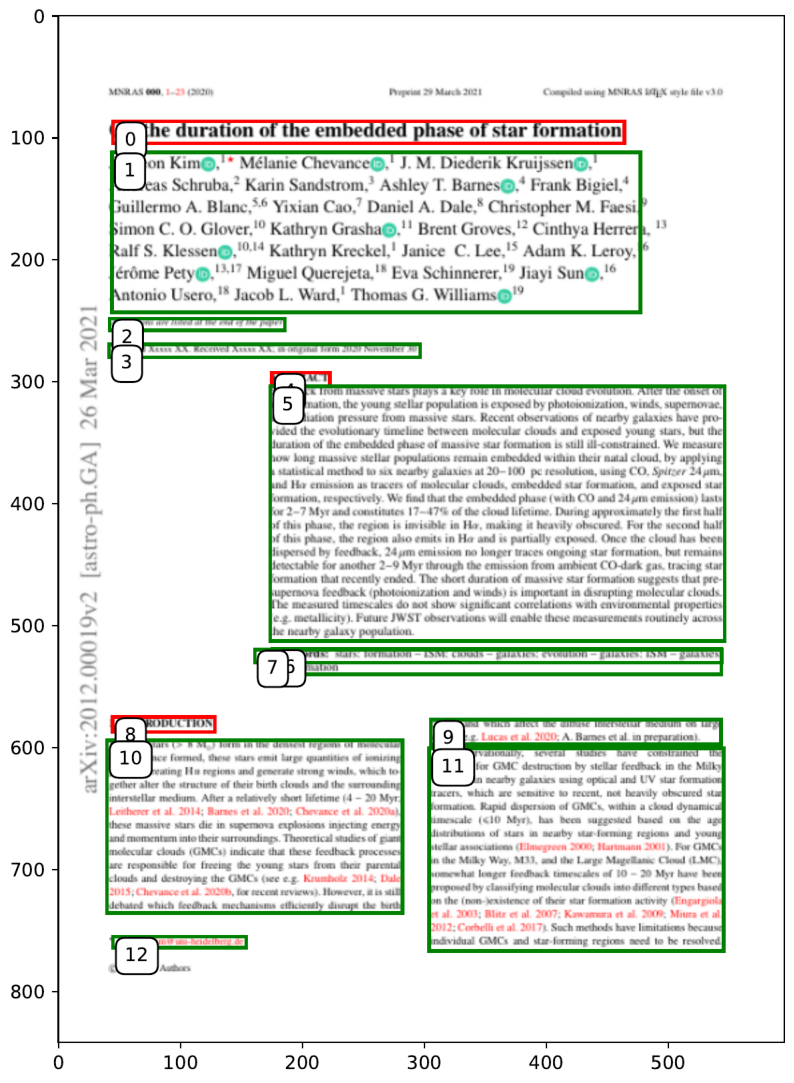

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


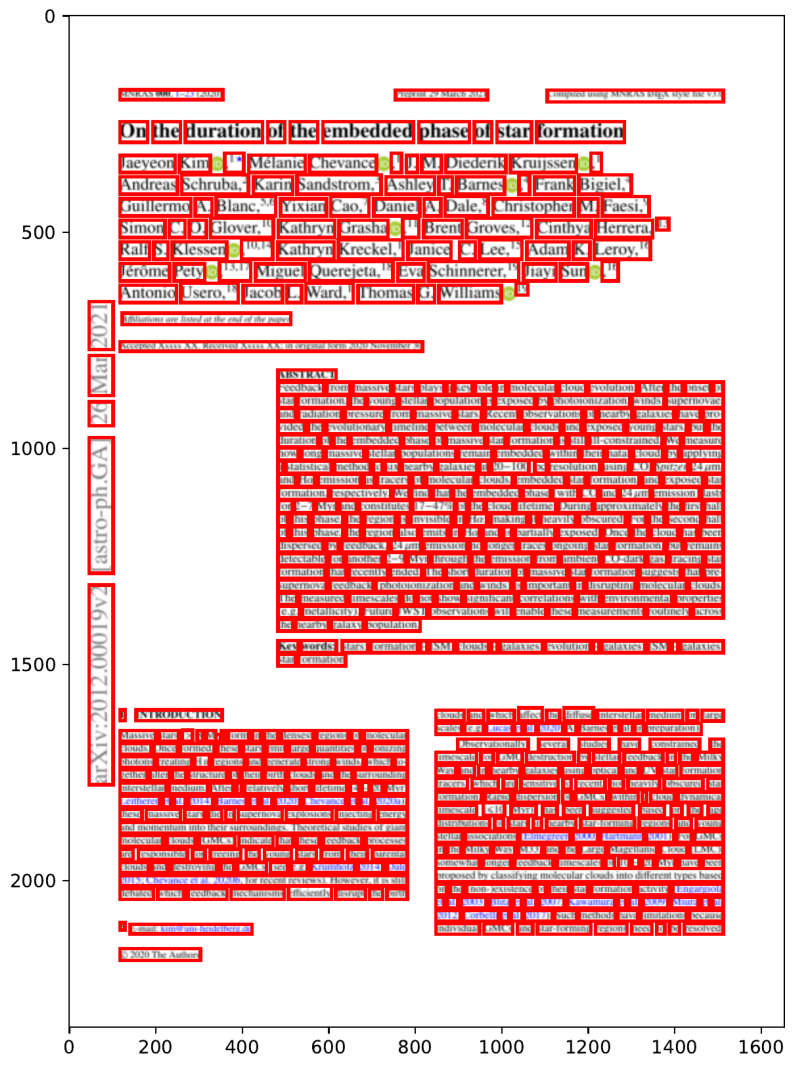

In [95]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

layout_images = convert_from_path(root_dir + 'PDF/output/visuals/lp_output.pdf')

img = layout_images[0]
plt.figure(figsize=(10, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

words_images = convert_from_path(root_dir + 'PDF/output/visuals/pdfplumber_output.pdf')

img = words_images[0]
plt.figure(figsize=(10, 16))
plt.imshow(img)
plt.axis('off')
plt.show()


In [96]:
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)
        
RenderJSON(pdf_tree)

In [97]:
import json
file_path = root_dir + 'PDF/output/pdf_tree.json'

with open(file_path, 'w') as file:
    json.dump(pdf_tree, file, indent=4)

In [98]:
import json
file_path = root_dir + 'PDF/output/chunks.json'

with open(file_path, 'w') as file:
    json.dump(new_layout_data, file, indent=4)

In [99]:
import numpy as np
import json
import sentence_transformers

model = sentence_transformers.SentenceTransformer('all-MiniLM-L6-v2')

# Load JSON data from file
with open(root_dir + 'PDF/output/chunks.json', 'r') as file:
    chunks = json.load(file)

# Extract content and ids
contents = [item["content"] for item in chunks]
ids = [item["id"] for item in chunks]

# Generate embeddings for the contents
embeddings = model.encode(contents)

# Save the embeddings and ids to .npy files
np.save(root_dir + 'PDF/output/embeddings.npy', embeddings)
np.save(root_dir + 'PDF/output/ids.npy', ids)


In [112]:
user_query = "Earliest phase of star formation.\n"
query_embed = model.encode([user_query])

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

# Load embeddings and ids from .npy files
embeddings = np.load(root_dir + 'PDF/output/embeddings.npy')
ids = np.load(root_dir + 'PDF/output/ids.npy', allow_pickle=True)


# Calculate cosine similarity between query and all embeddings
similarities = cosine_similarity(query_embed, embeddings)

# Find the top 4 indices
top_indices = np.argsort(similarities[0])[::-1][:10]
top_scores = np.sort(similarities[0])[::-1][:10]

# Retrieve and print the corresponding strings and scores
for index, score in zip(top_indices, top_scores):
    content_id = ids[index]

    # Assuming chunks is the list of dictionaries loaded from 'chunks.json'
    corresponding_string = "No matching content found"
    for item in chunks:
        if item["id"] == content_id:
            corresponding_string = item["content"]
            break

    print(corresponding_string)


On the duration of the embedded phase of star formation
4.2 Heavily obscured phase of star formation
of star formation and finally in Hα when the star-forming regions become (partially) exposed.
The age estimates of the exposed star-forming regions (re- ferred to as C-type in Corbelli et al. 2017) from spectral energy distribution (SED) fitting are available in Sharma et al. (2011), and are obtained using photometric data at various wavelengths simul- taneously,such asUV, Hα, and24µm. Theage ofthe C-typephase corresponds to the time it takes for the cloud to evolve from the end of the heavily obscured phase of star formation (observed with 24µm but without Hα) to the end of the exposed young stellar re- gion phase (both 24µm and Hα are observed). This duration there- fore corresponds to t 24µm − t obscured in our analysis. Corbelli et al. (2017) find that the C-type phase in M33 lasts for 8 Myr (without quoted uncertainty), which is in excellent agreement with our mea- surement of 8.4+

In [115]:
from transformers import BertTokenizer, EncoderDecoderModel

finetuned_bert_model = EncoderDecoderModel.from_pretrained("checkpoint-53835/")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [108]:
user_query = "earliest phase of star formation\n"
query_embed = model.encode([user_query])

from sklearn.metrics.pairwise import cosine_similarity

# Load embeddings and ids from .npy files
embeddings = np.load(root_dir + 'PDF/output/embeddings.npy')
ids = np.load(root_dir + 'PDF/output/ids.npy', allow_pickle=True)


# Calculate cosine similarity between query and all embeddings
similarities = cosine_similarity(query_embed, embeddings)

# Find the top 4 indices
top_indices = np.argsort(similarities[0])[::-1][:10]
top_scores = np.sort(similarities[0])[::-1][:10]

# Retrieve and print the corresponding strings and scores
for index, score in zip(top_indices, top_scores):
    content_id = ids[index]

    # Assuming chunks is the list of dictionaries loaded from 'chunks.json'
    corresponding_string = "No matching content found"
    for item in chunks:
        if item["id"] == content_id:
            corresponding_string = item["content"]
            break

from transformers import BertTokenizer, EncoderDecoderModel

finetuned_bert_model = EncoderDecoderModel.from_pretrained("checkpoint-53835/")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

article = user_query + corresponding_string
input_ids = tokenizer(article, return_tensors="pt").input_ids
output_ids = finetuned_bert_model.generate(input_ids)

print(tokenizer.decode(output_ids[0], skip_special_tokens=True))


first phase of star formation we present a characterisation of the evolutionary timeline from molecular clouds to young stellar regions in six nearby galaxies. we measure the duration of the 24 - month emission phase ( t - 24 ), the du - 24 sentinel. this is the time of the year, when massive star fb, 24, and 24 - 7. the average distance between independent obscured regions evolving from clouds to massive star formation.
